In [38]:
# Testing DBSCAN model
import pandas as pd
import numpy as np

df0 = pd.read_csv('./data/clean_lyrics.csv')
df0.head()

,Unnamed: 0,id,artist,title,lyrics,annotation_count,api_path,full_title,header_image_thumbnail_url,header_image_url,...,title_with_featured,url,album_api_path,album_cover_art_url,album_full_title,album_id,album_name,album_release_date_for_display,album_url,corpus
0,0,67402,Allen Stone,Unaware,8 ContributorsUnaware Lyrics[Verse 1]\nEvery d...,10,/songs/67402,Unaware by Allen Stone,https://images.rapgenius.com/6248f3270cbafc21d...,https://images.rapgenius.com/6248f3270cbafc21d...,...,Unaware,https://genius.com/Allen-stone-unaware-lyrics,/albums/15294,https://images.genius.com/6248f3270cbafc21d633...,Allen Stone by Allen Stone,15294.0,Allen Stone,"August 3, 2011",https://genius.com/albums/Allen-stone/Allen-stone,Every day the deficit grows You spend more tha...
1,1,522386,Allen Stone,Bed I Made,12 ContributorsBed I Made Lyrics[Verse 1]\nI t...,2,/songs/522386,Bed I Made by Allen Stone,https://images.genius.com/9e2484740a23ab507048...,https://images.genius.com/9e2484740a23ab507048...,...,Bed I Made,https://genius.com/Allen-stone-bed-i-made-lyrics,/albums/115385,https://images.genius.com/9e2484740a23ab507048...,Radius by Allen Stone,115385.0,Radius,"May 27, 2015",https://genius.com/albums/Allen-stone/Radius,I took a plane over the stars It didnt get me ...
2,2,3640112,Allen Stone,Brown Eyed Lover,7 ContributorsBrown Eyed Lover Lyrics[Intro]\n...,1,/songs/3640112,Brown Eyed Lover by Allen Stone,https://images.genius.com/a9d77547adad4b4940af...,https://images.genius.com/a9d77547adad4b4940af...,...,Brown Eyed Lover,https://genius.com/Allen-stone-brown-eyed-love...,/albums/563423,https://images.genius.com/7ebb66bbededa7e11ed6...,Building Balance by Allen Stone,563423.0,Building Balance,"November 8, 2019",https://genius.com/albums/Allen-stone/Building...,Waiting Waiting Waiting Ive got a brown eyed...
3,3,4878887,Allen Stone,Give You Blue,7 ContributorsGive You Blue Lyrics[Verse 1]\nI...,1,/songs/4878887,Give You Blue by Allen Stone,https://images.genius.com/dc504069404f6e1aa045...,https://images.genius.com/dc504069404f6e1aa045...,...,Give You Blue,https://genius.com/Allen-stone-give-you-blue-l...,/albums/563423,https://images.genius.com/7ebb66bbededa7e11ed6...,Building Balance by Allen Stone,563423.0,Building Balance,"November 8, 2019",https://genius.com/albums/Allen-stone/Building...,I cant stop the rain But I will keep you dry I...
4,4,1930003,Allen Stone,American Privilege,14 ContributorsAmerican Privilege Lyrics[Hook]...,9,/songs/1930003,American Privilege by Allen Stone,https://images.genius.com/9e2484740a23ab507048...,https://images.genius.com/9e2484740a23ab507048...,...,American Privilege,https://genius.com/Allen-stone-american-privil...,/albums/115385,https://images.genius.com/9e2484740a23ab507048...,Radius by Allen Stone,115385.0,Radius,"May 27, 2015",https://genius.com/albums/Allen-stone/Radius,Robbing Peter to pay Paul Cash that paycheck s...


In [39]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1637 non-null   int64  
 1   id                              1637 non-null   int64  
 2   artist                          1637 non-null   object 
 3   title                           1637 non-null   object 
 4   lyrics                          1637 non-null   object 
 5   annotation_count                1637 non-null   int64  
 6   api_path                        1637 non-null   object 
 7   full_title                      1637 non-null   object 
 8   header_image_thumbnail_url      1637 non-null   object 
 9   header_image_url                1637 non-null   object 
 10  lyrics_owner_id                 1637 non-null   int64  
 11  lyrics_state                    1637 non-null   object 
 12  path                            16

In [40]:
df = df0.dropna(subset=['corpus'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 1636
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1621 non-null   int64  
 1   id                              1621 non-null   int64  
 2   artist                          1621 non-null   object 
 3   title                           1621 non-null   object 
 4   lyrics                          1621 non-null   object 
 5   annotation_count                1621 non-null   int64  
 6   api_path                        1621 non-null   object 
 7   full_title                      1621 non-null   object 
 8   header_image_thumbnail_url      1621 non-null   object 
 9   header_image_url                1621 non-null   object 
 10  lyrics_owner_id                 1621 non-null   int64  
 11  lyrics_state                    1621 non-null   object 
 12  path                            1621 no

In [130]:
# NOTE needs old version of scipy --> pip install scipy==1.10.1
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

custom_stopwords = {'like', 'got', 'dont', 'aint','im','want','youre','oh','let','ill',
                   'get','cant','make','know','come','cant','go','said','could','wan','na',
                   'gon','see','yeah','doo','ooh','la','da','back','time','cause'}


# Example preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic characters
    stop_words = set(stopwords.words('english')) | custom_stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens


[nltk_data] Downloading package punkt to C:\Users\Valentin
[nltk_data]     Baltazar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Valentin
[nltk_data]     Baltazar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Valentin
[nltk_data]     Baltazar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [131]:
# preprocess_text(df['corpus'][0])
processed_corpus = [preprocess_text(doc) for doc in list(df['corpus'])]

In [132]:
from gensim import corpora

# Create dictionary
dictionary = corpora.Dictionary(processed_corpus)

# Create bag-of-words representation
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]

In [160]:
from gensim.models import LdaModel

# Train LDA model
lda_model = LdaModel(bow_corpus, num_topics=5, id2word=dictionary, passes=10, 
                     eta='auto', alpha='auto', decay=0.1)

In [161]:
# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.043*"love" + 0.012*"baby" + 0.012*"say" + 0.010*"never" + 0.009*"one" + 0.008*"need" + 0.008*"take" + 0.007*"way" + 0.007*"away" + 0.007*"thing"

Topic: 1 
Words: 0.008*"buck" + 0.007*"yo" + 0.007*"keep" + 0.005*"hey" + 0.005*"low" + 0.005*"straight" + 0.005*"way" + 0.004*"ticket" + 0.004*"liveget" + 0.004*"day"

Topic: 2 
Words: 0.010*"right" + 0.009*"away" + 0.007*"thats" + 0.007*"keep" + 0.006*"love" + 0.006*"one" + 0.006*"think" + 0.006*"never" + 0.006*"black" + 0.006*"say"

Topic: 3 
Words: 0.017*"nigga" + 0.016*"shit" + 0.012*"fuck" + 0.010*"never" + 0.009*"need" + 0.009*"bitch" + 0.007*"uh" + 0.005*"give" + 0.005*"em" + 0.005*"joyner"

Topic: 4 
Words: 0.010*"feel" + 0.009*"way" + 0.009*"never" + 0.007*"life" + 0.007*"take" + 0.007*"ive" + 0.007*"wont" + 0.007*"love" + 0.007*"little" + 0.007*"say"



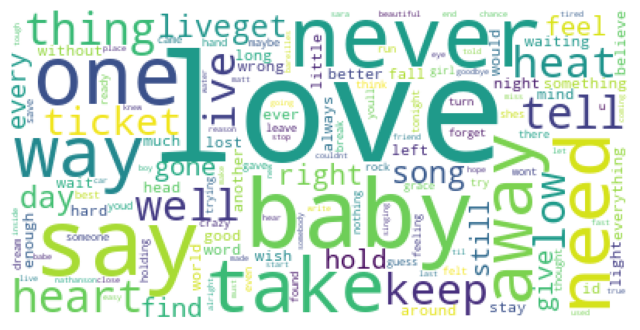

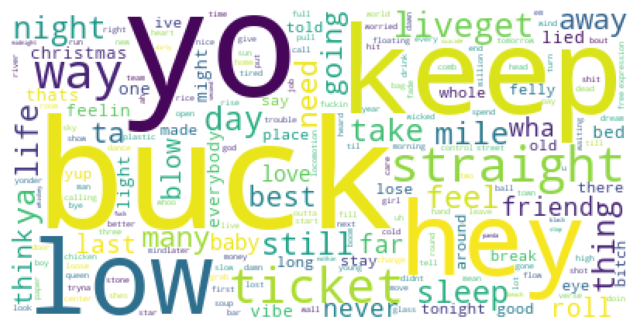

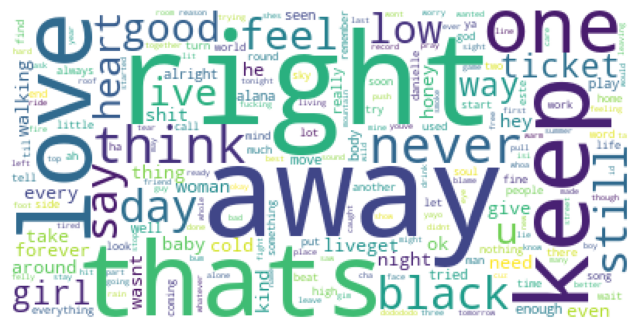

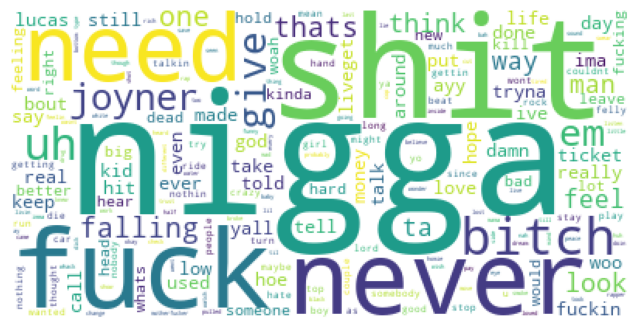

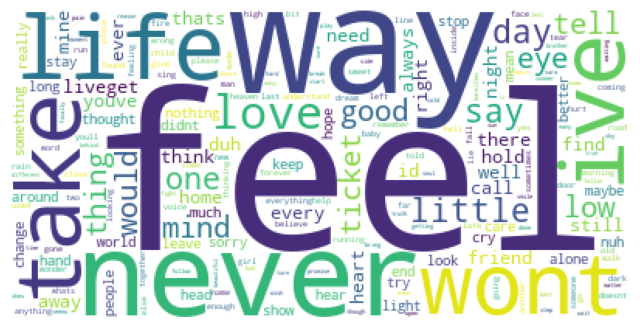

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for each topic
topics_words = lda_model.show_topics(formatted=False, num_words=200)

# Create a word cloud for each topic
for topic_id, words in topics_words:
    word_freq = dict(words)
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    # plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()